In [143]:
import os
import sys
import pickle as pk
import numpy as np

In [6]:
os.chdir('../')

In [16]:
[file for file in os.listdir('facebook/') if file.endswith('.pkl')]

['sp_search_results_temp.pkl',
 'ddg_search_results_temp.pkl',
 'manual_search_resdict.pkl',
 'fb_safety.pkl',
 'google_search_results.pkl',
 'specific_fb_groups.pkl',
 'fb_search_results.pkl',
 'fb_data_searchscrape.pkl',
 'few-google_search_results_temp.pkl',
 'google_search_results_temp.pkl',
 'specific_fb_pages.pkl']

In [17]:
[file for file in os.listdir('netmums/') if file.endswith('.pkl')]

['basicblurbs.pkl', 'allposts2.pkl', 'allposts.pkl', 'basicblurbs2.pkl']

In [116]:
with open('facebook/fb_data_searchscrape.pkl', 'rb') as f:
    temp = pk.load(f)

In [24]:
len(temp)

447

In [56]:
import re
import matplotlib.pyplot as plt

In [29]:
posts = [key for key in temp.keys() if re.search('posts/[^?]+',key)]
pages = [key for key in temp.keys() if not re.search('posts/[^?]+',key)]

In [31]:
len(posts)


225

total comments scraped: 4679


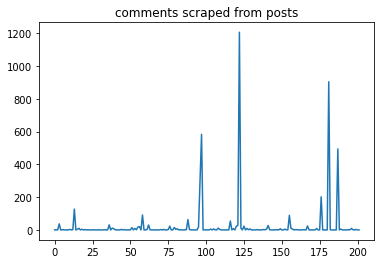

In [117]:
tt = [len(temp[post][0]['comments_full']) for post in posts if temp[post][0]['comments_full'] is not None]
plt.plot(tt)
plt.title('comments scraped from posts')
print('total comments scraped:', sum(tt))

total comments scraped: 324941


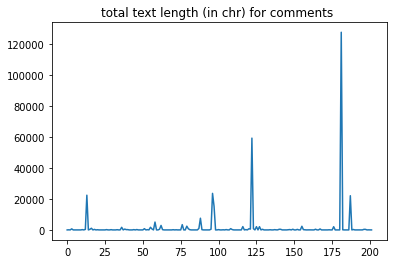

In [119]:
#sum([len(c['comment_text']) for c in temp[post][0]['comments_full']])
tt = [sum([len(c['comment_text']) for c in temp[post][0]['comments_full']]) for post in posts if temp[post][0]['comments_full'] is not None]
plt.plot(tt)
plt.title('total text length (in chr) for comments ')
print('total comments scraped:', sum(tt))

total comments scraped: 916652


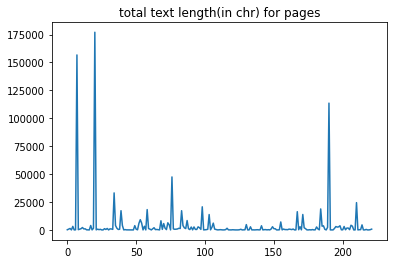

In [118]:
tt = [sum([sum( [len(c['comment_text']) for c in post['comments_full'] if c]) for post in temp[page] if post['comments_full']]) for page in pages]
plt.plot(tt)
plt.title('total text length(in chr) for pages')

In [101]:
# ^^ theres some pages with a lot of text but few comments. :)

61

In [ ]:
#TODO; convert the data to a dataframe (?? is this even useful...)

## Examine Netmums Scrape

In [122]:
with open('netmums/allposts.pkl', 'rb') as f:
    temp = pk.load(f)

In [123]:
len(temp)
#6523 threads

6523

In [125]:
nmkeys = list(temp.keys())

total comments scraped: 135049


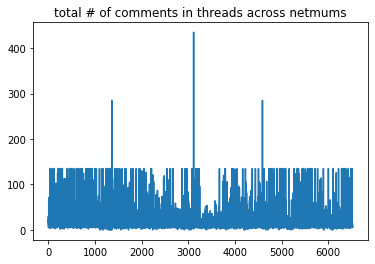

In [175]:
tt = [len(temp[key]['posts']) for key in nmkeys]
plt.plot(tt)
plt.title('total # of comments in threads across netmums')
print('total comments scraped:', sum(tt))

In [176]:
#why is there this weird ass line?? cuttof??

np.median(tt)

12.0

In [177]:
np.quantile(tt, q=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])

array([ 5.,  7.,  9., 10., 12., 15., 19., 26., 43.])

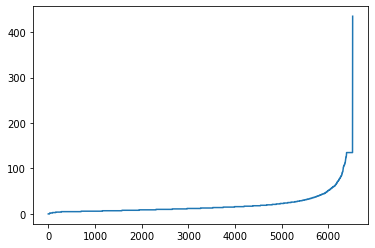

In [178]:
plt.plot(np.sort(tt))

In [186]:
np.quantile(tt, q=[0.97,0.975,0.979,0.98,0.99, 0.999, 0.9995, 0.9999, 0.99999, 1])

array([104.34 , 112.   , 126.038, 135.   , 135.   , 135.   , 135.   ,
       337.17 , 425.217, 435.   ])

In [ ]:
# we can see that the weird line is at 135.

In [190]:
weird_keys_nm = [key for key in nmkeys if len(temp[key]['posts']) == 135]
successful_keys_nm = [key for key in nmkeys if len(temp[key]['posts']) > 135]

In [189]:
weird_keys_nm

['https://www.netmums.com/coffeehouse/family-food-recipes-555/food-tips-ideas-556/840648-healthy-non-processed-cheap-foodie-thread.html',
 'https://www.netmums.com/coffeehouse/other-chat-514/news-12/743981-do-you-pay-your-prescriptions.html',
 'https://www.netmums.com/coffeehouse/product-tests-sponsored-chat-competitions-251/netmums-product-testing-181/1710804-review-thread-super-yummies-dairy-pots-product-trial.html',
 'https://www.netmums.com/coffeehouse/being-mum-794/babies-birth-12-months-58/1637916-can-i-give-my-5-month-baby-ambrosia-custard.html',
 'https://www.netmums.com/coffeehouse/family-food-recipes-555/feeding-kids-481/1405002-water-only-policy-madness.html',
 'https://www.netmums.com/coffeehouse/other-chat-514/news-12/593997-what-issue-baby-jars-ready-made-baby-food-anyway.html',
 'https://www.netmums.com/coffeehouse/baby-794/babies-birth-12-months-58/487733-anyone-refused-immunisation-vaccination.html',
 'https://www.netmums.com/coffeehouse/family-food-recipes-555/feeding

In [192]:
successful_keys_nm

['https://www.netmums.com/coffeehouse/becoming-mum-ttc-64/trying-conceive-clubs-525/1735305-january-ttc-bfp-train-17.html',
 'https://www.netmums.com/coffeehouse/being-mum-794/baby-clubs-593/1815689-babies-born-november-2018-a-23.html',
 'https://www.netmums.com/coffeehouse/pregnancy-64/preparing-baby-870/1218683-bf-vs-formula-do-both-10.html']

total posts scraped: 86112346


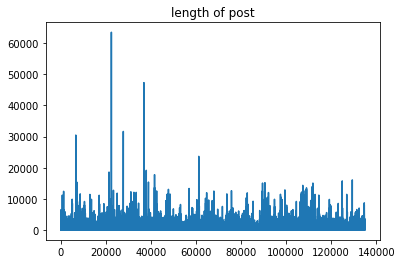

In [168]:
#length of each post
tt = [len(post['body']) for key in nmkeys for post in temp[key]['posts']]
plt.plot(tt)
plt.title('length of post')
print('total posts scraped:', sum(tt))

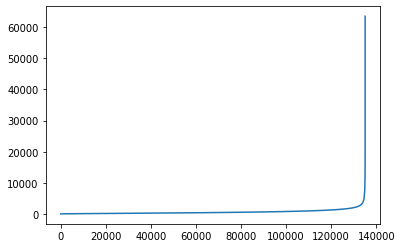

In [169]:
plt.plot(np.sort(tt))

Text(0.5, 1.0, 'average length of posts in a thread')

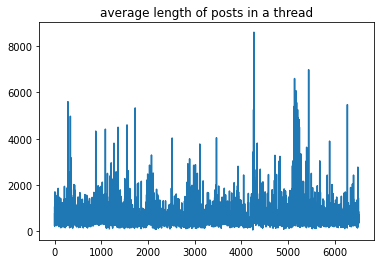

In [172]:
#average post length per thread
tt = [np.mean([len(post['body']) for post in temp[key]['posts']]) for key in nmkeys]
plt.plot(tt)
plt.title('average length of posts in a thread')

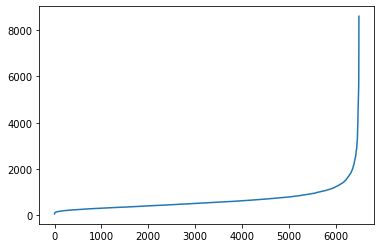

In [173]:
plt.plot(np.sort(tt))